In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
conn=sqlite3.connect('../../db/proyectomacro.db')
df=pd.read_sql_query("SELECT * FROM Tasa_Crecimiento_PIB ",conn)
df.set_index('año',inplace=True)
df.columns

Index(['crecimiento'], dtype='object')

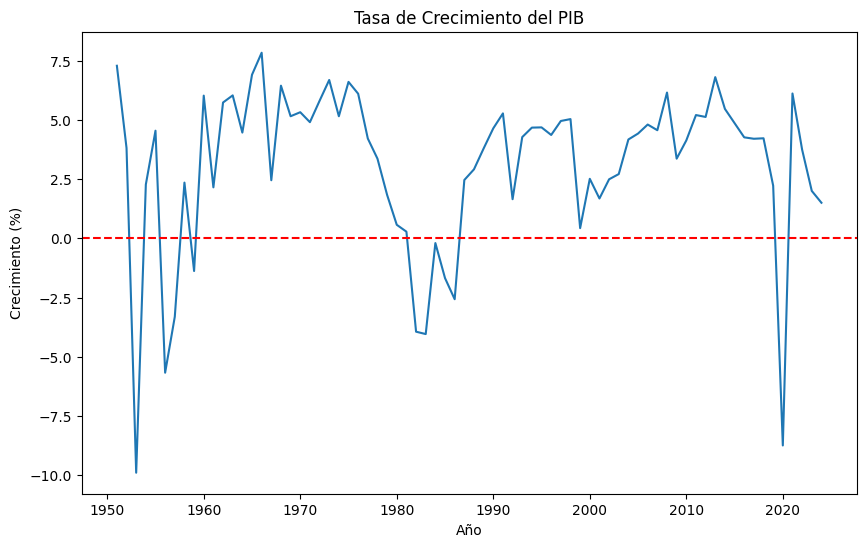

In [3]:

# Visualización de la tasa de crecimiento a lo largo de los años
df['crecimiento'].plot(figsize=(10, 6))
plt.title('Tasa de Crecimiento del PIB')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.axhline(y=0, color='red', linestyle='--', label='Línea en y=0')
plt.show()

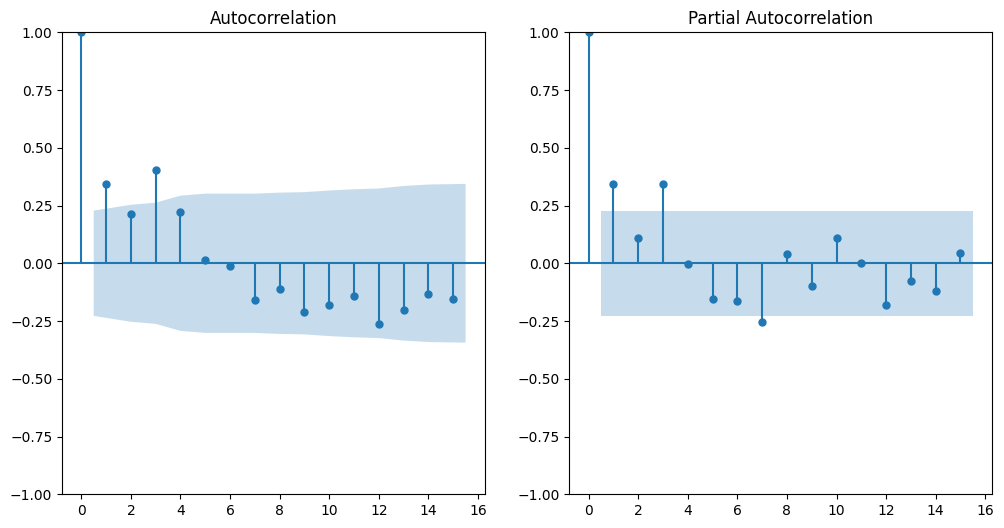

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF (Autocorrelación)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['crecimiento'], lags=15, ax=plt.gca())

# Graficar PACF (Autocorrelación Parcial)
plt.subplot(122)
plot_pacf(df['crecimiento'], lags=15, ax=plt.gca())  # Reducir el número de lags

plt.show()

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Suponiendo que seleccionamos p=1, d=1, q=1 (puedes ajustar estos valores)
model = ARIMA(df['crecimiento'], order=(1, 1, 1))
model_fit = model.fit()

# Ver resumen del modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            crecimiento   No. Observations:                   74
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -191.981
Date:                Tue, 22 Jul 2025   AIC                            389.961
Time:                        16:47:28   BIC                            396.832
Sample:                             0   HQIC                           392.699
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0090      0.178     -0.051      0.960      -0.357       0.339
ma.L1         -0.6411      0.145     -4.434      0.000      -0.924      -0.358
sigma2        11.1836      1.016     11.009      0.0

/home/navi/Desktop/archivos/DS/eco/Proyecto_macro/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/navi/Desktop/archivos/DS/eco/Proyecto_macro/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/navi/Desktop/archivos/DS/eco/Proyecto_macro/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [6]:
df

,crecimiento
año,
1951,7.28
1952,3.81
1953,-9.89
1954,2.27
1955,4.54
...,...
2020,-8.74
2021,6.11
2022,3.74
